https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

In [1]:
import torch 

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [6]:
i = torch.ones((5, 3), dtype=torch.int64)
i

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [9]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
r2 = torch.rand(2, 2)
torch.manual_seed(1729)
r3 = torch.rand(2, 3)
print(f" {r1}\n {r2}\n {r3}\n")
r4 = r3.reshape(6)
print(r4)

 tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
 tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
 tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])

tensor([0.3126, 0.3791, 0.3087, 0.0736, 0.4216, 0.0691])


In [10]:
r = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.7668, -0.5953],
        [-0.7838, -0.0073]])

Absolute value of r:
tensor([[0.7668, 0.5953],
        [0.7838, 0.0073]])

Inverse sine of r:
tensor([[-0.8738, -0.6377],
        [-0.9007, -0.0073]])

Determinant of r:
tensor(-0.4610)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.7942, -0.6076],
        [-0.6076,  0.7942]]),
S=tensor([1.1855, 0.3889]),
V=tensor([[ 0.9154, -0.4026],
        [ 0.4026,  0.9154]]))

Average and standard deviation of r:
(tensor(0.3641), tensor(-0.5383))

Maximum value of r:
tensor(-0.0073)


In [11]:
import torch.nn as nn 
import torch.nn.functional as F

In [17]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size: 
            num_features *= s
        return num_features 
    
    

In [18]:
net = LeNet()
print(f"Net: {net}")

input = torch.rand(1, 1, 32, 32)
print(f"Image batch shape: {input.shape}")

output = net(input)
print(f"Raw output: \n{output}")
print(f"Raw output shape: {output.shape}")

Net: LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Image batch shape: torch.Size([1, 1, 32, 32])
Raw output: 
tensor([[ 0.0040, -0.0161, -0.0039,  0.0435, -0.0308, -0.0969, -0.0212,  0.0935,
         -0.1062,  0.0736]], grad_fn=<AddmmBackward0>)
Raw output shape: torch.Size([1, 10])


In [19]:
import torchvision 
import torchvision.transforms as transforms 

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [22]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

horse	  cat	 deer	 deer


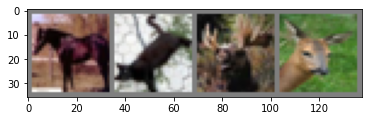

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('\t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.255
[1,  4000] loss: 1.947
[1,  6000] loss: 1.748
[1,  8000] loss: 1.600
[1, 10000] loss: 1.557
[1, 12000] loss: 1.485
[2,  2000] loss: 1.421
[2,  4000] loss: 1.417
[2,  6000] loss: 1.383
[2,  8000] loss: 1.325
[2, 10000] loss: 1.338
[2, 12000] loss: 1.314
Finished Training


In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

NameError: name 'test_loader' is not defined